# 💎 Value Functions: V(s) และ Q(s,a)
## เข้าใจความแตกต่างและการใช้งาน

---

## 📖 เรื่องราว: นักเทรดสองคน

สมมติมีนักเทรด 2 คน:

### 👤 นักเทรด A (State Value Thinker)
เขาคิดแบบนี้:
- "ตอนนี้ราคาหุ้นที่ $100 → คาดว่าจะได้กำไรเท่าไร?"
- มองแค่ว่า **สถานะปัจจุบันดีแค่ไหน**
- ไม่สนใจว่าจะทำ action อะไร

**นี่คือ State Value Function: V(s)**

---

### 👥 นักเทรด B (Action-Value Thinker)
เขาคิดแบบนี้:
- "ตอนนี้ราคา $100, ถ้า **ซื้อ** → คาดว่าได้กำไร?"
- "ตอนนี้ราคา $100, ถ้า **ขาย** → คาดว่าได้กำไร?"
- "ตอนนี้ราคา $100, ถ้า **รอ** → คาดว่าได้กำไร?"
- มองว่า **แต่ละ action มีค่าเท่าไร**

**นี่คือ Action-Value Function: Q(s,a)**

---

## 🧠 ความแตกต่างระหว่าง V(s) และ Q(s,a)

### 1️⃣ State Value Function: V(s)

**คำจำกัดความ:**
```
V(s) = Expected return เมื่ออยู่ที่ state s และทำตาม policy π
```

**Mathematical Formula:**
```
V^π(s) = E_π[G_t | S_t = s]
        = E_π[R_{t+1} + γ*V^π(S_{t+1}) | S_t = s]
```

**ตัวอย่าง:**
- V(ราคา $100) = 5.2 → อยู่ที่สถานะนี้ คาดว่าจะได้ return รวม $5.2
- V(มี position) = -2.1 → สถานะนี้ไม่ดี คาดว่าจะขาดทุน

> แต่! ไม่บอกว่า action ไหนทำให้ได้กำไรมากขึ้น
---

### 2️⃣ Action-Value Function: Q(s,a)

**คำจำกัดความ:**
```
Q(s,a) = Expected return เมื่ออยู่ที่ state s, ทำ action a, แล้วทำตาม policy π
```

**Mathematical Formula:**
```
Q^π(s,a) = E_π[G_t | S_t = s, A_t = a]
          = E[R_{t+1} + γ*V^π(S_{t+1}) | S_t = s, A_t = a]
```
$Q^\pi(s,a) = \mathbb{E}_\pi \big[\, R_{t+1} + \gamma V^\pi(S_{t+1}) \,\big|\, S_t = s, A_t = a \big]$

**ตัวอย่าง:**
- Q(ราคา $100, Buy) = 8.5 → ซื้อตอนนี้ คาดว่าได้ $8.5
- Q(ราคา $100, Sell) = -3.2 → ขายตอนนี้ คาดว่าขาดทุน
- Q(ราคา $100, Hold) = 2.1 → รอตอนนี้ คาดว่าได้ $2.1

> Q(s,a) คือ “ค่าคาดหวังของการเลือก action a ตอนนี้ แล้วได้รางวัล + อนาคตที่ลดค่าด้วย γ”
---

## 🔗 ความสัมพันธ์ระหว่าง V(s) และ Q(s,a)

$
V^\pi(s) = \sum_a \pi(a|s) \, Q^\pi(s,a)
$


**ความหมาย:**
- V(s) = ค่าเฉลี่ยถ่วงน้ำหนักของ Q(s,a) ทุก action
- น้ำหนักคือ probability ที่ policy เลือก action นั้น

**ถ้า policy เป็น Deterministic (เลือก action เดียวแน่ๆ):**

$
V(s) = Q(s, a^*)
$
โดยที่ $a^*$ คือ action ที่ policy เลือกทำใน state นั้น

**ถ้า policy เป็น Greedy (เลือก action ที่ดีที่สุด):**

$
V^*(s) = \max_a Q^*(s,a)
$ ← Optimal value

**ตัวอย่าง**
สมมติคุณอยู่ใน state Start แล้วมี 2 ทางเลือก:
| Action  | Next state | Reward | Probability |
| :------ | :--------- | :----: | :---------: |
| GoLeft  | Bad        |   -3   |     1.0     |
| GoRight | Good       |   +5   |     1.0     |

และ Good / Bad เป็น terminal → $V(Good)=V(Bad)=0, γ=0.9$

$Q(Start,GoLeft)=-3+0.9×0=-3$

$Q(Start,GoRight)=+5+0.9×0=5$

ดังนั้น
$V(Start)= \max⁡_a Q(Start,a)=5$

→ Agent ควรเลือก GoRight เพราะ Q สูงกว่า <br>
(แปลว่า “ผลตอบแทนคาดหวังสูงกว่า”)

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import pandas as pd

plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style('whitegrid')

print("📦 Libraries loaded!")

📦 Libraries loaded!


## 🎮 ตัวอย่าง: Grid World with V(s) and Q(s,a)

เรามาสร้าง simple grid และคำนวณทั้ง V(s) และ Q(s,a)

In [9]:
class GridWorldValues:
    def __init__(self, size=4, gamma=0.9):
        self.size = size
        self.gamma = gamma
        self.actions = ['↑', '↓', '←', '→']
        self.action_effects = {
            '↑': (-1, 0),
            '↓': (1, 0),
            '←': (0, -1),
            '→': (0, 1)
        }
        
        # Goal และ Holes
        self.goal = (size-1, size-1)
        self.holes = [(1, 1), (2, 2)]
        
        # Initialize V(s) and Q(s,a)
        self.V = np.zeros((size, size))
        self.Q = {a: np.zeros((size, size)) for a in self.actions}
    
    def is_valid(self, pos):
        """Check if position is valid"""
        r, c = pos
        return 0 <= r < self.size and 0 <= c < self.size
    
    def get_next_state(self, state, action):
        """Get next state after action"""
        dr, dc = self.action_effects[action]
        next_state = (state[0] + dr, state[1] + dc)
        
        if not self.is_valid(next_state):
            return state  # ชนฝา, อยู่ที่เดิม
        return next_state
    
    # def get_reward(self, state, next_state):
    #     """Get reward for transition"""
    #     if next_state == self.goal:
    #         return 10
    #     elif next_state in self.holes:
    #         return -10
    #     else:
    #         return -1  # Step penalty
    
    def get_reward(self, state, next_state):
        if next_state == self.goal or next_state in self.holes:
            return 0     # ✅ no reward when entering terminal
        else:
            return -1

    def update_q_values(self):
        """Update Q(s,a) using Bellman equation"""
        new_Q = {a: np.zeros((self.size, self.size)) for a in self.actions}
        
        for r in range(self.size):
            for c in range(self.size):
                state = (r, c)
                
                # Terminal states
                if state == self.goal or state in self.holes:
                    continue
                
                # Update Q for each action
                for action in self.actions:
                    next_state = self.get_next_state(state, action)
                    reward = self.get_reward(state, next_state)
                    
                    # Bellman equation for Q
                    new_Q[action][r, c] = reward + self.gamma * self.V[next_state]
        
        self.Q = new_Q
    
    def update_v_values(self, policy='greedy'):
        """Update V(s) from Q(s,a)"""
        new_V = np.zeros((self.size, self.size))
        
        for r in range(self.size):
            for c in range(self.size):
                state = (r, c)
                
                # Terminal states
                if state == self.goal:
                    new_V[r, c] = 10
                elif state in self.holes:
                    new_V[r, c] = -10
                else:
                    # Get Q values for all actions
                    q_values = [self.Q[a][r, c] for a in self.actions]
                    
                    if policy == 'greedy':
                        # V(s) = max Q(s,a)
                        new_V[r, c] = max(q_values)
                    elif policy == 'uniform':
                        # V(s) = average Q(s,a)
                        new_V[r, c] = np.mean(q_values)
        
        self.V = new_V
    
    def value_iteration(self, num_iterations=20, policy='greedy'):
        """Run value iteration"""
        print(f"🔄 Running Value Iteration with {policy} policy...\n")
        
        for i in range(num_iterations):
            self.update_q_values()
            self.update_v_values(policy=policy)
            
            if i % 5 == 0:
                print(f"Iteration {i}: V(0,0) = {self.V[0,0]:.2f}, V(0,1) = {self.V[0,1]:.2f}")
        
        print("\n✅ Converged!")
    
    def get_optimal_policy(self):
        """Get optimal policy from Q values"""
        rng = np.random.default_rng(seed=42)
        
        # ป้องกัน Q ค้างจากรอบก่อนใน terminal
        for term_state in [self.goal] + self.holes:
            for a in self.actions:
                self.Q[a][term_state] = 0.0

        policy = np.empty((self.size, self.size), dtype=str)
        
        for r in range(self.size):
            for c in range(self.size):
                if (r, c) == self.goal:
                    policy[r, c] = '★'
                elif (r, c) in self.holes:
                    policy[r, c] = '✖'
                else:
                    q_values = [self.Q[a][r, c] for a in self.actions]
                    # best_action_idx = np.argmax(q_values)
                    # random tie-breaker
                    best_idxs = np.flatnonzero(q_values == np.max(q_values))
                    best_action_idx = rng.choice(best_idxs)  # ✅ ใช้ RNG ใหม่
                    policy[r, c] = self.actions[best_action_idx]
        
        return policy

# Create and train
grid = GridWorldValues(size=4, gamma=0.9)
grid.value_iteration(num_iterations=20, policy='greedy')

print(f"\n📊 Final V(0,0) = {grid.V[0,0]:.2f}")
print(f"📊 Final V(goal) = {grid.V[grid.goal]:.2f}")

🔄 Running Value Iteration with greedy policy...

Iteration 0: V(0,0) = -1.00, V(0,1) = 0.00
Iteration 5: V(0,0) = -4.10, V(0,1) = 2.47
Iteration 10: V(0,0) = 1.22, V(0,1) = 2.47
Iteration 15: V(0,0) = 1.22, V(0,1) = 2.47

✅ Converged!

📊 Final V(0,0) = 1.22
📊 Final V(goal) = 10.00


## 📊 Visualize V(s): State Values

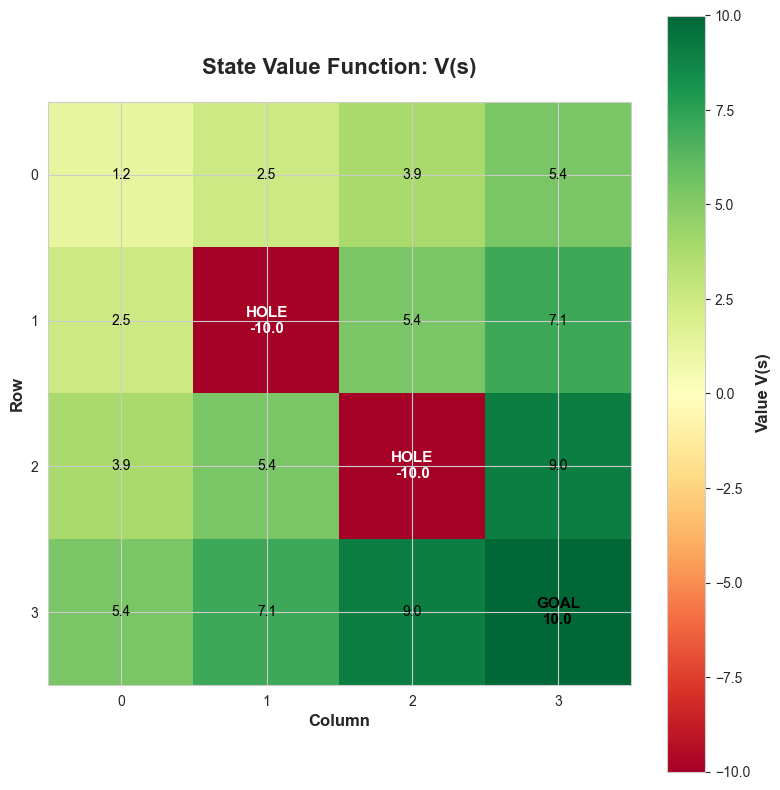


💡 Interpretation:
- สีเขียว = State ที่ดี (ใกล้ Goal, V สูง)
- สีแดง = State ที่แย่ (ใกล้ Hole, V ต่ำ)
- V(s) บอกว่า expected return จาก state นั้นเท่าไร


In [3]:
# Visualize V(s)
fig, ax = plt.subplots(figsize=(8, 8))

# Plot heatmap
im = ax.imshow(grid.V, cmap='RdYlGn', interpolation='nearest')

# Add values
for r in range(grid.size):
    for c in range(grid.size):
        if (r, c) == grid.goal:
            text = ax.text(c, r, f'GOAL\n{grid.V[r, c]:.1f}',
                          ha="center", va="center", color="black", fontweight='bold', fontsize=11)
        elif (r, c) in grid.holes:
            text = ax.text(c, r, f'HOLE\n{grid.V[r, c]:.1f}',
                          ha="center", va="center", color="white", fontweight='bold', fontsize=11)
        else:
            text = ax.text(c, r, f'{grid.V[r, c]:.1f}',
                          ha="center", va="center", color="black", fontsize=10)

ax.set_title('State Value Function: V(s)', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(grid.size))
ax.set_yticks(range(grid.size))
ax.set_xlabel('Column', fontsize=12, fontweight='bold')
ax.set_ylabel('Row', fontsize=12, fontweight='bold')

# Colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Value V(s)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("- สีเขียว = State ที่ดี (ใกล้ Goal, V สูง)")
print("- สีแดง = State ที่แย่ (ใกล้ Hole, V ต่ำ)")
print("- V(s) บอกว่า expected return จาก state นั้นเท่าไร")

### (อธิบาย) โครงสร้างของโลก (Grid World)

Grid World = โลกจำลองที่แบ่งเป็นช่อง ๆ (state)
เช่นในรูปเป็นขนาด 4×4

- ✅ Goal (★): เป้าหมาย ได้รางวัล +10
- 💀 Hole (✖): หลุม ได้รางวัล -10 (ตาย)
- 🟩 ช่องอื่น ๆ: เดินได้ แต่เสียค่าเดินทีละ -1
- 🔄 Action: ↑ ↓ ← →
- 🧠 γ (gamma) = 0.9 → ให้ความสำคัญกับอนาคต

---

เรากำหนดว่า

$
R(s, a, s') =
\begin{cases}
-1, & \text{ถ้ายังไม่ถึง terminal} \\
0,  & \text{ถ้าเข้า goal หรือ hole}
\end{cases}
$

และ

$V(goal)=10,V(hole)=-10$

ดังนั้น Bellman update คือ

$V(s) = \max_a \Big[ R(s, a, s') + \gamma V(s') \Big]$

โดย γ=0.9
________________________________________
### 🧩 Step 1: (2,3) → (3,3)
  - state = (2,3)
  - next_state = (3,3) (goal)
  - reward = 0
  - V(3,3)=10

$Q(2,3,↓)=0+0.9×10=9$

⇒ V(2,3)=9.0
________________________________________
### 🧩 Step 2: (1,2) → (2,3)
  - reward = −1
  - V(2,3)=9.0

$Q(1,2,↓)=-1+0.9×9=-1+8.1=7.1$

⇒ V(1,2)=7.1
________________________________________
### 🧩 Step 3: (0,2) → (1,2)
  - reward = −1
  - V(1,2)=7.1

$Q(0,2,↓)=-1+0.9×7.1=-1+6.39=5.39$

⇒ V(0,2)=5.4
________________________________________
### 🧩 Step 4: (0,1) → (0,2)
  - reward = −1
  - V(0,2)=5.4

$Q(0,1,→)=-1+0.9×5.4=-1+4.86=3.86$

⇒ V(0,1)=3.9
________________________________________
### 🧩 Step 5: (0,0) → (0,1)
  - reward = −1
  - V(0,1)=3.9

$Q(0,0,→)=-1+0.9×3.9=-1+3.51=2.51$

⇒ V(0,0)=2.5
________________________________________

| รอบที่ | State |  สมการ Bellman  | ค่า V(s) |
| :----: | :---: | :-------------: | :------: |
|    0   | (3,3) | Terminal (Goal) |   10.0   |
|    1   | (2,3) |   (0 + 0.9×10)  |    9.0   |
|    2   | (1,2) |   (−1 + 0.9×9)  |    7.1   |
|    3   | (0,2) |  (−1 + 0.9×7.1) |    5.4   |
|    4   | (0,1) |  (−1 + 0.9×5.4) |    3.9   |
|    5   | (0,0) |  (−1 + 0.9×3.9) |    2.5   |


## 🎯 Visualize Q(s,a): Action Values

มาดูว่าแต่ละ action มีค่าเท่าไร

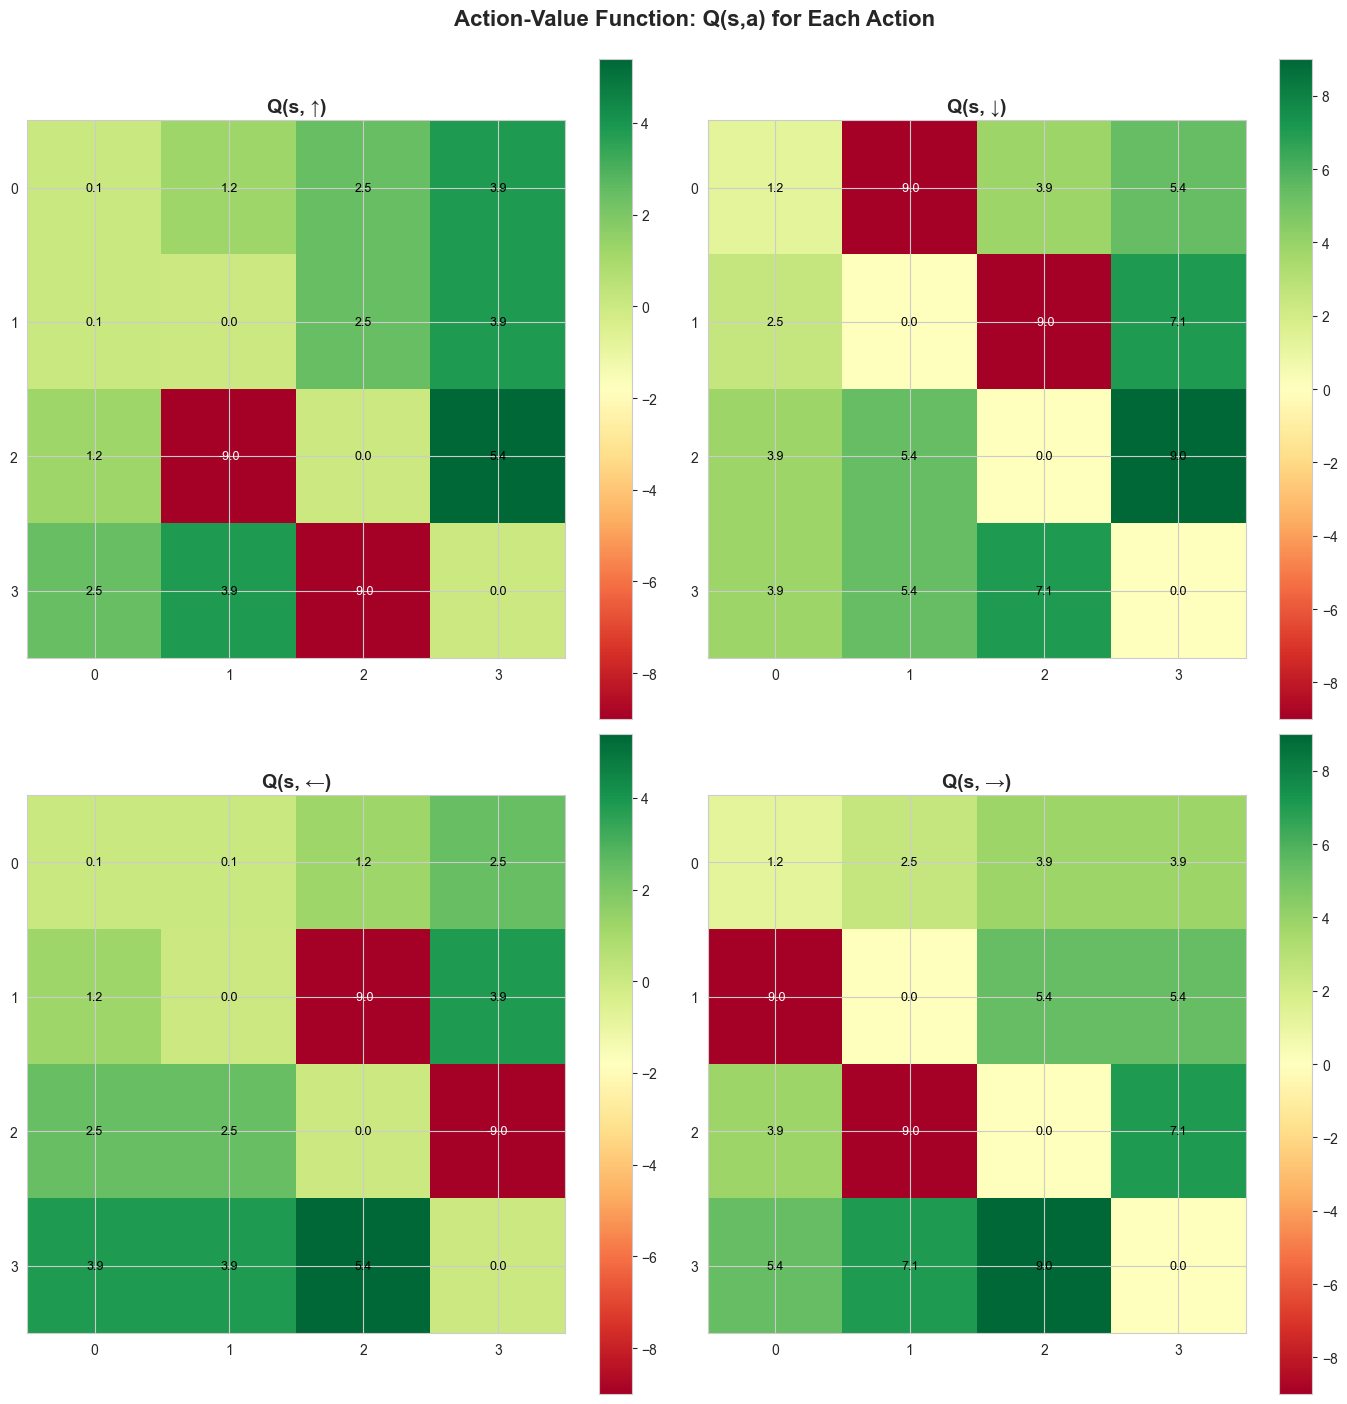


💡 Interpretation:
- Q(s,a) บอกว่า ถ้าทำ action นั้นที่ state นั้น จะได้ return เท่าไร
- แต่ละ state มี 4 Q values (4 actions)
- สีเขียว = action ที่ดี, สีแดง = action ที่แย่


In [4]:
# Visualize Q(s,a) for each action
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
axes = axes.flatten()

for idx, action in enumerate(grid.actions):
    ax = axes[idx]
    im = ax.imshow(grid.Q[action], cmap='RdYlGn', interpolation='nearest')
    
    # Add values
    for r in range(grid.size):
        for c in range(grid.size):
            value = grid.Q[action][r, c]
            color = 'white' if value < 0 else 'black'
            ax.text(c, r, f'{value:.1f}', ha="center", va="center", 
                   color=color, fontsize=9)
    
    ax.set_title(f'Q(s, {action})', fontsize=14, fontweight='bold')
    ax.set_xticks(range(grid.size))
    ax.set_yticks(range(grid.size))
    
    # Colorbar
    plt.colorbar(im, ax=ax)

plt.suptitle('Action-Value Function: Q(s,a) for Each Action', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("- Q(s,a) บอกว่า ถ้าทำ action นั้นที่ state นั้น จะได้ return เท่าไร")
print("- แต่ละ state มี 4 Q values (4 actions)")
print("- สีเขียว = action ที่ดี, สีแดง = action ที่แย่")

> ค่า Action-Value Function Q(s,a)จะ “เปลี่ยนไปทุกครั้ง” เมื่อค่า State-Value V(s) เปลี่ยน  
และทั้งคู่จะ ค่อย ๆ ปรับเข้าหากันจนถึงค่าที่เสถียร (converge)

## 🧭 Optimal Policy from Q(s,a)

### 1. Policy คืออะไร
Policy (π) = กลยุทธ์การเลือกการกระทำ (action) ในแต่ละสถานะ (state)
- π(s) → บอกว่า "อยู่ที่ state s แล้วควรทำอะไร"
- เช่น
  - π(0,0) = “→”
  - π(1,2) = “↓”
________________________________________
### 2. จาก Q(s,a) → Optimal Policy
เมื่อเรามี Action-Value Function Q(s,a)แล้ว  
เราสามารถเลือก การกระทำที่ดีที่สุด ในแต่ละ state ได้เลยโดยใช้:

$π^* (s)= \arg⁡max⁡_a Q(s,a)$

แปลไทยคือ:
> "เลือก action ที่ให้ค่า Q มากที่สุดใน state นั้น"
________________________________________
🧠 3. เหตุผลทางคณิตศาสตร์
Bellman Optimality Equation บอกว่า:

$V^* (s) = \max⁡_a Q^* (s,a)$

และ

$Q^*(s,a) = R(s,a,s') + \gamma V^*(s')$


ดังนั้น —  
1️⃣ Q คือค่าคาดหวังของการ “ทำ action a” แล้วเดินไปยัง state ต่อไป  
2️⃣ V คือ “ค่าที่ดีที่สุด” ของ state นั้น (เมื่อเลือก action ดีที่สุด)  
3️⃣ ดังนั้น policy ที่ดีที่สุดคือ action ที่ทำให้ Q สูงสุด

R = −1 สำหรับก้าวปกติ, เข้าสู่ terminal ให้ R = 0, V(goal)=10, V(hole)=−10, γ=0.9, เดินได้
| ครั้ง | State ที่อัปเดต | Next states (จาก action) |            Bellman Update           | ค่าใหม่ V(s) | หมายเหตุ                   |
| :---: | :-------------: | :----------------------: | :---------------------------------: | :----------: | :------------------------- |
|   1   |      (0,0)      |      →(0,1), ↓(1,0)      | `max(-1+0.9*V(0,1), -1+0.9*V(1,0))` |     ≈ 1.2    | เดินขวาหรือลงดีที่สุด      |
|   2   |      (0,1)      |      →(0,2), ↓(1,1)      | `max(-1+0.9*V(0,2), -1+0.9*V(1,1))` |     ≈ 2.5    | ขวาดีกว่า เพราะ (1,1)=Hole |
|   3   |      (1,0)      |      →(1,1), ↓(2,0)      |  `max(-1+0.9*V(2,0), -1+0.9*(-10))` |     ≈ 2.5    | ลงดีกว่า, หลบ Hole         |
|   4   |      (0,2)      |      →(0,3), ↓(1,2)      | `max(-1+0.9*V(0,3), -1+0.9*V(1,2))` |     ≈ 3.9    | ยังหลบ Hole (2,2)          |
|   5   |      (1,2)      |      →(1,3), ↓(2,2)      |  `max(-1+0.9*V(1,3), -1+0.9*(-10))` |     ≈ 5.4    | ลงตาย, ต้องไปขวา           |
|   6   |      (2,3)      |      →(3,3), ↑(1,3)      |     `max(-1+0.9*10, -1+0.9*7.1)`    |     ≈ 9.0    | ลงเข้าจุด Goal             |
|   7   |      (3,3)      |             —            |               Terminal              |     10.0     | Goal, ค่าคงที่             |

ที่มาของตัวเลขใช้สมการ
$Q^*(s,a) = R(s,a,s') + \gamma V^*(s')$ โดย $V$ มาจาก heatmap ล่าสุด

ตัวอย่าง:
- $Q(0,0,→)=-1+0.9×V(0,1)=-1+0.9×2.5=1.2$
- $Q(2,3,↓)=0+0.9×V(3,3)=0+0.9×10=9.0$


🧭 Optimal Policy:
[['↓' '→' '→' '↓']
 ['↓' '✖' '→' '↓']
 ['→' '↓' '✖' '↓']
 ['→' '→' '→' '★']]


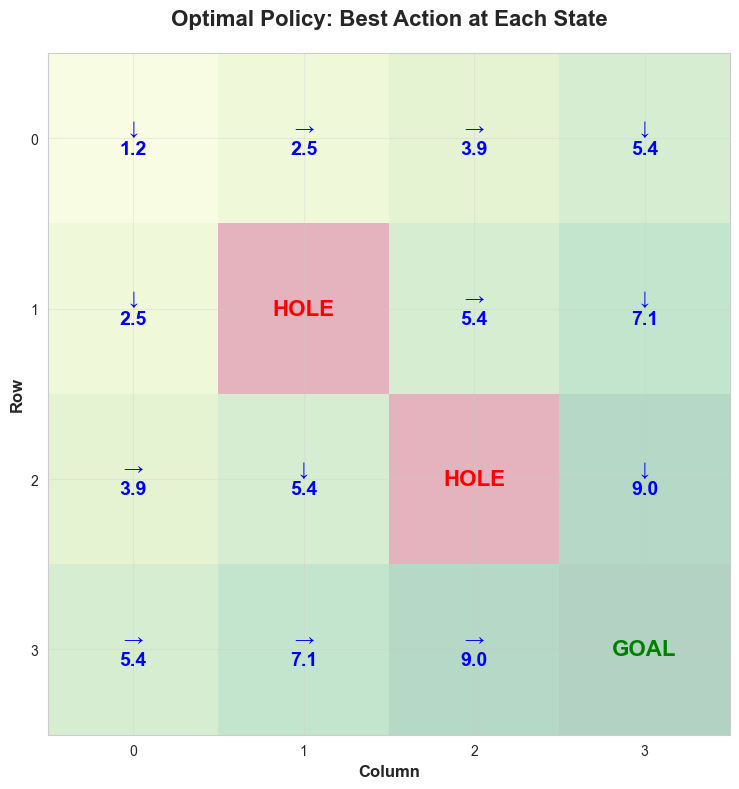


💡 Interpretation:
- ลูกศรแสดง action ที่ดีที่สุดสำหรับแต่ละ state
- Agent ควรทำตาม policy นี้เพื่อ maximize return
- นี่คือ greedy policy จาก Q values


In [10]:
# Get optimal policy
optimal_policy = grid.get_optimal_policy()

print("🧭 Optimal Policy:")
print("="*40)
print(optimal_policy)
print("="*40)

# Visualize policy
fig, ax = plt.subplots(figsize=(8, 8))

# Background
ax.imshow(grid.V, cmap='RdYlGn', interpolation='nearest', alpha=0.3)

# Add arrows and labels
for r in range(grid.size):
    for c in range(grid.size):
        action = optimal_policy[r, c]
        
        if action == '★':
            ax.text(c, r, 'GOAL', ha="center", va="center", 
                   fontsize=16, fontweight='bold', color='green')
        elif action == '✖':
            ax.text(c, r, 'HOLE', ha="center", va="center", 
                   fontsize=16, fontweight='bold', color='red')
        else:
            # Show arrow and Q value
            q_value = grid.Q[action][r, c]
            ax.text(c, r, f'{action}\n{q_value:.1f}', ha="center", va="center", 
                   fontsize=14, fontweight='bold', color='blue')

ax.set_title('Optimal Policy: Best Action at Each State', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(range(grid.size))
ax.set_yticks(range(grid.size))
ax.set_xlabel('Column', fontsize=12, fontweight='bold')
ax.set_ylabel('Row', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("- ลูกศรแสดง action ที่ดีที่สุดสำหรับแต่ละ state")
print("- Agent ควรทำตาม policy นี้เพื่อ maximize return")
print("- นี่คือ greedy policy จาก Q values")

## 📊 เปรียบเทียบ: Q(s,a) สำหรับ 1 State

มาดู Q values ของทุก actions ที่ state เดียว

📍 State: (1, 2)
📊 V(s) = 5.39

Q(s,a) for each action:
Q(s, ↑) =   2.47
Q(s, ↓) =  -9.00
Q(s, ←) =  -9.00
Q(s, →) =   5.39 ← BEST


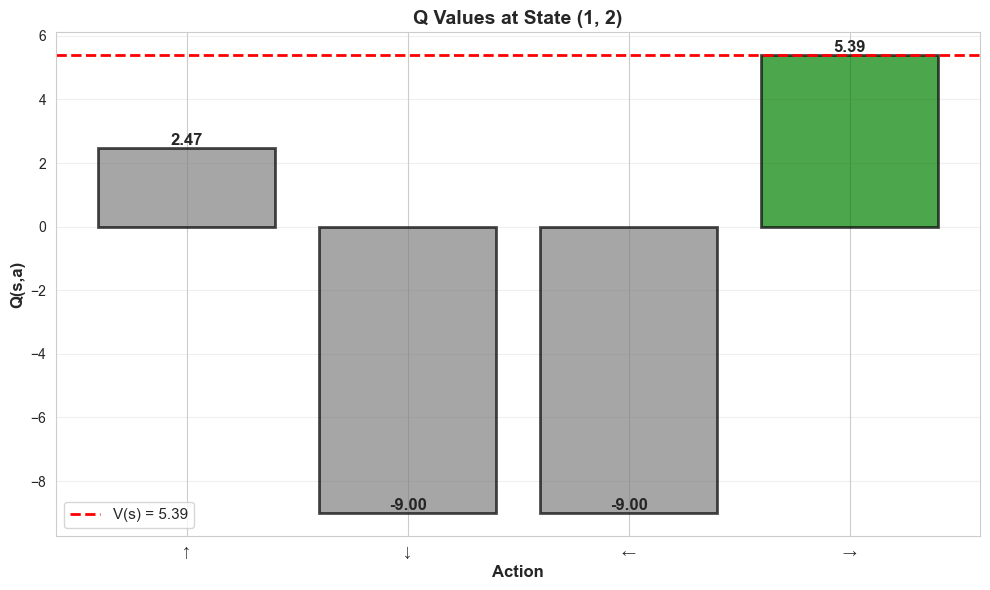


💡 Observations:
- Best action: →
- V(s) = max Q(s,a) = 5.39 (สำหรับ greedy policy)
- แต่ละ action ให้ผลลัพธ์ต่างกัน


In [6]:
# เลือก state ที่จะวิเคราะห์
example_state = (1, 2)

# Get Q values for all actions at this state
q_values_at_state = {action: grid.Q[action][example_state] for action in grid.actions}

print(f"📍 State: {example_state}")
print(f"📊 V(s) = {grid.V[example_state]:.2f}")
print("\nQ(s,a) for each action:")
print("="*40)
for action, q_val in q_values_at_state.items():
    marker = " ← BEST" if q_val == max(q_values_at_state.values()) else ""
    print(f"Q(s, {action}) = {q_val:6.2f}{marker}")
print("="*40)

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))

actions = list(q_values_at_state.keys())
values = list(q_values_at_state.values())
colors = ['green' if v == max(values) else 'gray' for v in values]

bars = ax.bar(actions, values, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add V(s) line
v_value = grid.V[example_state]
ax.axhline(y=v_value, color='red', linestyle='--', linewidth=2, label=f'V(s) = {v_value:.2f}')

ax.set_xlabel('Action', fontsize=12, fontweight='bold')
ax.set_ylabel('Q(s,a)', fontsize=12, fontweight='bold')
ax.set_title(f'Q Values at State {example_state}', fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Observations:")
print(f"- Best action: {max(q_values_at_state, key=q_values_at_state.get)}")
print(f"- V(s) = max Q(s,a) = {max(values):.2f} (สำหรับ greedy policy)")
print("- แต่ละ action ให้ผลลัพธ์ต่างกัน")

## 🔄 Relationship: V(s) = max Q(s,a)

มาพิสูจน์ว่า V(s) = max Q(s,a) สำหรับ optimal policy

In [7]:
# Verify relationship V(s) = max Q(s,a)
print("🔍 Verifying: V(s) = max Q(s,a)\n" + "="*60)

errors = []
for r in range(grid.size):
    for c in range(grid.size):
        if (r, c) == grid.goal or (r, c) in grid.holes:
            continue
        
        v_value = grid.V[r, c]
        q_values = [grid.Q[a][r, c] for a in grid.actions]
        max_q = max(q_values)
        
        error = abs(v_value - max_q)
        errors.append(error)
        
        if r == 0 and c <= 2:  # Show first few
            print(f"State ({r},{c}): V(s)={v_value:.3f}, max Q(s,a)={max_q:.3f}, Error={error:.6f}")

avg_error = np.mean(errors)
max_error = np.max(errors)

print("\n" + "="*60)
print(f"Average Error: {avg_error:.8f}")
print(f"Max Error: {max_error:.8f}")
print("\n✅ Relationship verified! V(s) ≈ max Q(s,a) for greedy policy")

🔍 Verifying: V(s) = max Q(s,a)
State (0,0): V(s)=1.219, max Q(s,a)=1.219, Error=0.000000
State (0,1): V(s)=2.466, max Q(s,a)=2.466, Error=0.000000
State (0,2): V(s)=3.851, max Q(s,a)=3.851, Error=0.000000

Average Error: 0.00000000
Max Error: 0.00000000

✅ Relationship verified! V(s) ≈ max Q(s,a) for greedy policy


## 🎯 Q-values ในการ Trading

มาดูตัวอย่างง่ายๆ ของ Q values ใน trading scenario

### State (สถานะตลาด)
| ตัวแปร         | ค่า                               | ความหมาย                     |
| :------------- | :-------------------------------- | :--------------------------- |
| `price_trend`  | `'rising'`, `'falling'`, `'flat'` | ทิศทางราคาตลาด               |
| `has_position` | `True` / `False`                  | มี position (ถือหุ้นอยู่ไหม) |

➡️ รวมทั้งหมด 3 × 2 = 6 states

_________________________________

### Action (การกระทำ)

`'buy'`, `'sell'`, `'hold'`  
คือสิ่งที่ Agent สามารถเลือกทำในแต่ละ state ได้
_________________________________

### Q-table (ค่าที่เรียนรู้ได้)

โครงสร้างเป็น dictionary ซ้อน dictionary:
```bash
{
    ('rising', False): {'buy': 8.5, 'sell': -2.0, 'hold': 3.2},
    ('rising', True):  {'buy': -1.0, 'sell': 5.5, 'hold': 6.8},
    ...
}
```

แปลว่า:

> ถ้าตลาดกำลังขึ้น (rising) และยังไม่ได้ถือหุ้น (False),  
ถ้า “ซื้อ” → ได้ Q=8.5, ถ้า “ขาย” → -2.0, ถ้า “ถือ” → 3.2  
⇒ ดังนั้น “buy” ดีสุด (เพราะ 8.5 ใหญ่สุด)

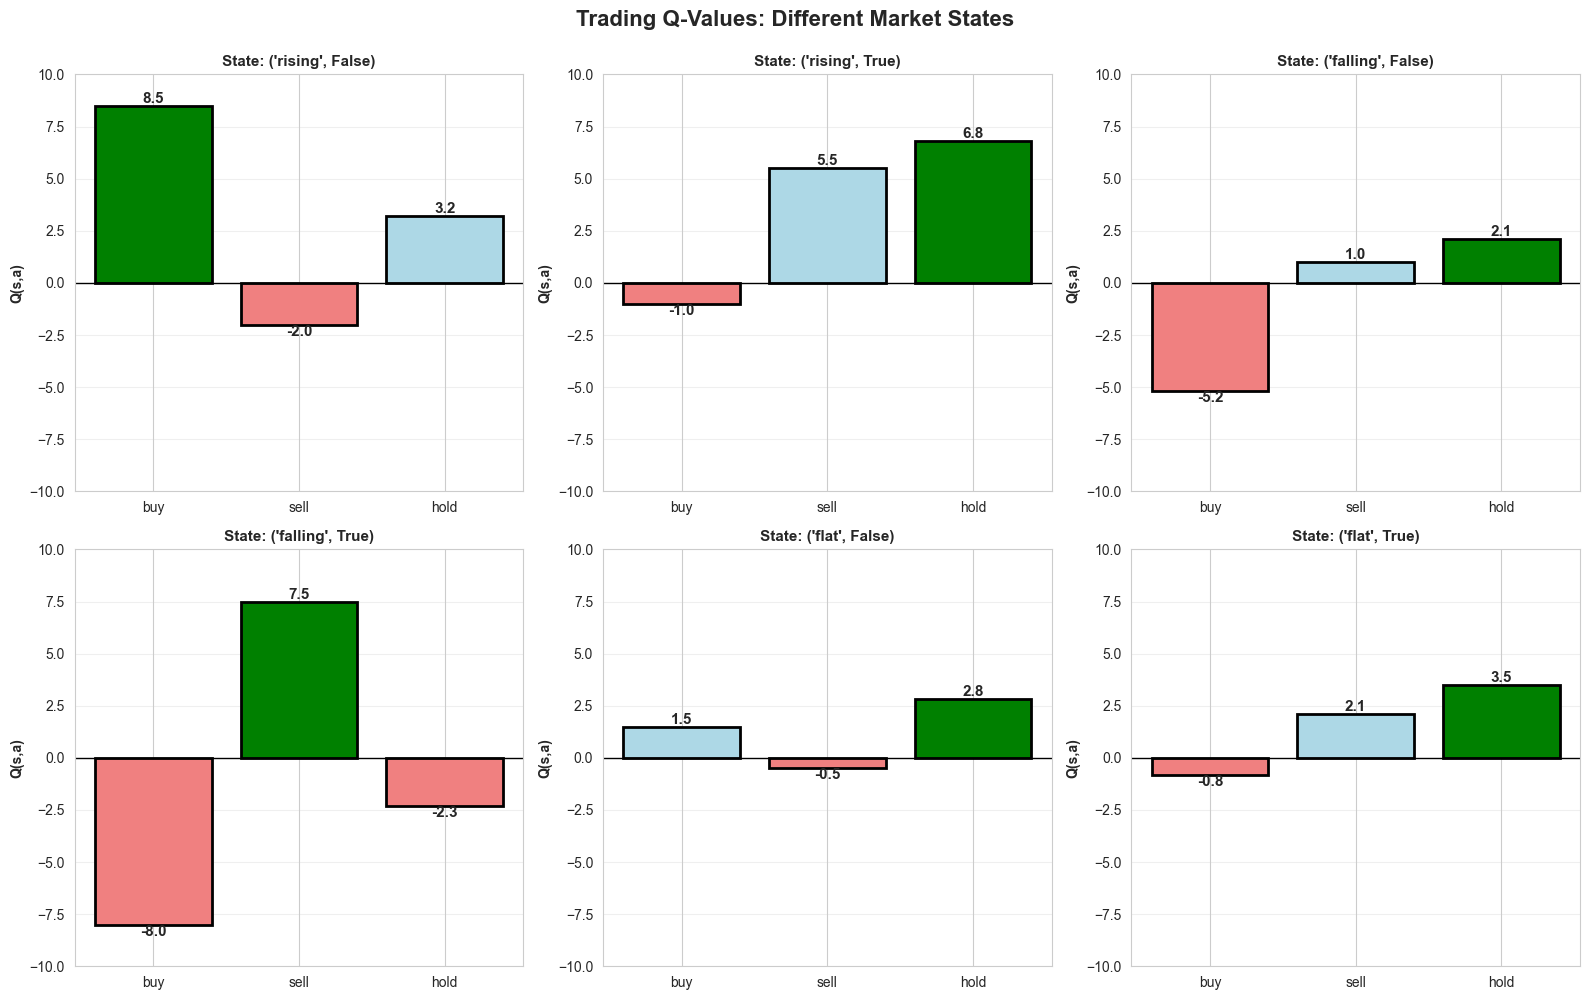


🎯 Optimal Actions:
State ('rising', False)         → Best: buy  (Q=8.5)
State ('rising', True)          → Best: hold (Q=6.8)
State ('falling', False)        → Best: hold (Q=2.1)
State ('falling', True)         → Best: sell (Q=7.5)
State ('flat', False)           → Best: hold (Q=2.8)
State ('flat', True)            → Best: hold (Q=3.5)

💡 Trading Insights:
- rising + no position → BUY (Q=8.5)
- falling + has position → SELL (Q=7.5)
- rising + has position → HOLD (Q=6.8) หรือ SELL (Q=5.5)
- Q-values ช่วยตัดสินใจว่า action ไหนดีที่สุดในแต่ละสถานการณ์


In [8]:
# Trading Q-values Example
class SimpleTradingExample:
    def __init__(self):
        # States: (price_trend, has_position)
        # price_trend: 'rising', 'falling', 'flat'
        # has_position: True/False
        
        # Actions: 'buy', 'sell', 'hold'
        
        # Mock Q-values (จาก training)
        self.Q_table = {
            ('rising', False): {'buy': 8.5, 'sell': -2.0, 'hold': 3.2},
            ('rising', True):  {'buy': -1.0, 'sell': 5.5, 'hold': 6.8},
            ('falling', False): {'buy': -5.2, 'sell': 1.0, 'hold': 2.1},
            ('falling', True):  {'buy': -8.0, 'sell': 7.5, 'hold': -2.3},
            ('flat', False):    {'buy': 1.5, 'sell': -0.5, 'hold': 2.8},
            ('flat', True):     {'buy': -0.8, 'sell': 2.1, 'hold': 3.5}
        }
    
    def get_best_action(self, state):
        q_values = self.Q_table[state]
        return max(q_values, key=q_values.get)
    
    def visualize_q_values(self):
        """Visualize Q-values for all state-action pairs"""
        fig, axes = plt.subplots(2, 3, figsize=(16, 10))
        axes = axes.flatten()
        
        states = list(self.Q_table.keys())
        
        for idx, state in enumerate(states):
            ax = axes[idx]
            q_values = self.Q_table[state]
            
            actions = list(q_values.keys())
            values = list(q_values.values())
            colors = ['green' if v == max(values) else 'lightcoral' if v < 0 else 'lightblue' 
                     for v in values]
            
            bars = ax.bar(actions, values, color=colors, edgecolor='black', linewidth=2)
            
            # Add value labels
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.1f}',
                       ha='center', va='bottom' if height > 0 else 'top', 
                       fontsize=11, fontweight='bold')
            
            ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
            ax.set_title(f'State: {state}', fontsize=11, fontweight='bold')
            ax.set_ylabel('Q(s,a)', fontsize=10, fontweight='bold')
            ax.grid(True, alpha=0.3, axis='y')
            ax.set_ylim(-10, 10)
        
        plt.suptitle('Trading Q-Values: Different Market States', 
                    fontsize=16, fontweight='bold', y=0.995)
        plt.tight_layout()
        plt.show()

# Create and visualize
trading_example = SimpleTradingExample()
trading_example.visualize_q_values()

print("\n🎯 Optimal Actions:")
print("="*60)
for state in trading_example.Q_table.keys():
    best_action = trading_example.get_best_action(state)
    q_value = trading_example.Q_table[state][best_action]
    # print(f"State {state:25s} → Best: {best_action:4s} (Q={q_value:.1f})")
    print(f"State {str(state):25s} → Best: {best_action:4s} (Q={q_value:.1f})")
print("="*60)

print("\n💡 Trading Insights:")
print("- rising + no position → BUY (Q=8.5)")
print("- falling + has position → SELL (Q=7.5)")
print("- rising + has position → HOLD (Q=6.8) หรือ SELL (Q=5.5)")
print("- Q-values ช่วยตัดสินใจว่า action ไหนดีที่สุดในแต่ละสถานการณ์")

## 🎓 สรุป: V(s) vs Q(s,a)

### 📌 State Value Function: V(s)
- **คำจำกัดความ:** Expected return จาก state s
- **ใช้เมื่อ:** รู้ policy แล้ว, ต้องการประเมิน state
- **ข้อดี:** เก็บค่าน้อยกว่า (1 value ต่อ state)
- **ข้อเสีย:** ไม่บอกว่าควรทำ action อะไร

### 📌 Action-Value Function: Q(s,a)
- **คำจำกัดความ:** Expected return จาก state s และ action a
- **ใช้เมื่อ:** ต้องการหา optimal policy
- **ข้อดี:** หา policy ได้โดยตรง: π(s) = argmax Q(s,a)
- **ข้อเสีย:** เก็บค่ามากกว่า (|A| values ต่อ state)

### 🔗 Relationship
```
V(s) = Σ π(a|s) * Q(s,a)           (General)
V*(s) = max_a Q*(s,a)               (Optimal)
Q(s,a) = E[R + γ*V(s')]             (Bellman)
```

### 💼 ใน Trading
- **Q-Network เป็นที่นิยม** เพราะ:
  - หา action ได้โดยตรง
  - เหมาะกับ discrete actions (Buy/Sell/Hold)
  - ไม่ต้องรู้ transition dynamics

---

## 🚀 Next Steps:

1. **Notebook 04:** Policies (Deterministic, Stochastic, Epsilon-Greedy)
2. **Notebook 05:** Exploration vs Exploitation

---

## 💪 แบบฝึกหัด

### Exercise 1: คำนวณ V(s) จาก Q(s,a)
สมมติ:
- Q(s, up) = 5
- Q(s, down) = 3
- Q(s, left) = -2
- Q(s, right) = 7

คำนวณ V(s) สำหรับ:
1. Greedy policy
2. Uniform random policy

### Exercise 2: สร้าง Q-table สำหรับ Crypto Trading
States: (trend, volatility, position)
- trend: 'up', 'down'
- volatility: 'high', 'low'
- position: 'long', 'short', 'none'

Actions: 'buy', 'sell', 'hold'

สร้าง mock Q-table และหา optimal policy

### Exercise 3: Value Iteration
ใช้ GridWorldValues class:
1. เพิ่ม holes ที่ตำแหน่งอื่น
2. Run value iteration
3. วิเคราะห์ V(s) และ optimal policy

---

**🎯 Ready to learn about Policies?**

👉 [Next: 04_policies.ipynb](04_policies.ipynb)